# Base Model
Here is a Python script of a holiday product profit model.

In [1]:
#Inputs
fixed_cost = 750
variable_cost = 8
sales_price = 18
salvage_value = 6
demand = 1400
order = 1600

In [2]:
#quantity_calcs
quantity_sold = min(demand, order)
quantity_salvaged = order - quantity_sold
print(quantity_sold, quantity_salvaged)

1400 200


In [3]:
#revenue calcs
rev_sales = quantity_sold*sales_price
rev_salvaged = quantity_salvaged*salvage_value
total_rev = rev_sales + rev_salvaged
print(total_rev)

26400


In [4]:
#cost calculations
total_cost = fixed_cost + variable_cost*order
print(total_cost)

13550


In [5]:
#profit
profit = total_rev - total_cost
print(profit)

12850


# Model as Function
Below, I've wrapped the above model wrapped into a function (with default values)

In [6]:
def profit(fixed_cost = 750,
            sales_price = 18,
            variable_cost = 8,
            salvage_value = 6,
            demand = 1400,
            order = 1600):
  #quantity_calcs
  quantity_sold = min(demand, order)
  quantity_salvaged = order - quantity_sold
  
  #revenue calcs
  rev_sales = quantity_sold*sales_price
  rev_salvaged = quantity_salvaged*salvage_value
  total_rev = rev_sales + rev_salvaged
  
  #cost calculations
  total_cost = fixed_cost + variable_cost*order
  
  #profit
  profit = total_rev - total_cost
  return profit

In [7]:
profit()

12850

## Business Scenario
Your boss points out that the main uncertain input is the demand quantity. It is hard to forecast. While your analyst’s best guess for demand is 1400, they are only 80% confident that it will be between 1000 and 1800. 

The company is in trouble if we don’t make at least $10,000. 


### Import necessary libaries

In [8]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

### Business Question 1
Under this demand uncertainty, what’s the risk of us not hitting that $10,000 profit target? How can you best visualize this risk?

In [ ]:
# Setup random inputs (range = 1000 - 1800, n = 1000)
demand_random_inputs = np.random.uniform(1000, 1800, 1000)
#print(demand_random_inputs)
profit_outputs = [profit(demand = i) for i in demand_random_inputs]
#print(profit_outputs)

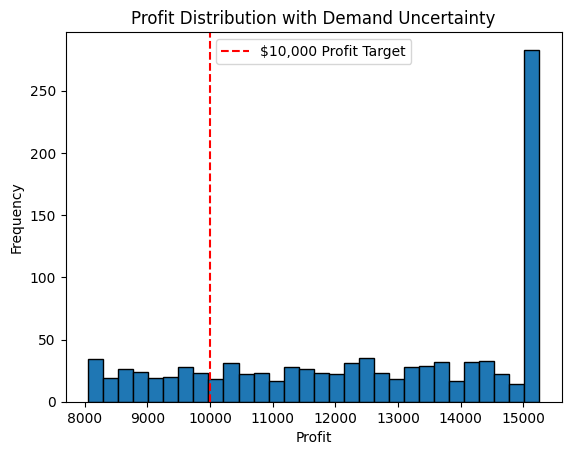

In [13]:
# Visualize the profit distribution
plt.hist(profit_outputs, bins=30, edgecolor='black')
plt.axvline(x=10000, color='red', linestyle='--', label='$10,000 Profit Target')
plt.title('Profit Distribution with Demand Uncertainty')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [15]:
# Determine the risk of not hitting the $10,000 profit target
risk = sum(p < 10000 for p in profit_outputs)

print(f'Risk of not hitting $10,000 profit target: {risk/len(profit_outputs):.2%}')

Risk of not hitting $10,000 profit target: 19.50%


### Business Question 2
The default order quantity in the model is 1600. How does the risk (a) change if we decide to order 1300 instead? How can you best visualize this comparison?

In [16]:
# Caluclate the profit for and order quantity of 1600 and an order quantitiy of 1300.
profit_1600 = [profit(demand = i, order = 1600) for i in demand_random_inputs]
profit_1300 = [profit(demand = i, order = 1300) for i in demand_random_inputs]

In [23]:
# Calculate the risk for both order quantities
risk_1600 = sum(p < 10000 for p in profit_1600)
risk_1300 = sum(p < 10000 for p in profit_1300)
print(f'Risk of not hitting $10,000 profit target with order 1600: {risk_1600/len(profit_1600):.2%}')
print(f'Risk of not hitting $10,000 profit target with order 1300: {risk_1300/len(profit_1300):.2%}')

Risk of not hitting $10,000 profit target with order 1600: 19.50%
Risk of not hitting $10,000 profit target with order 1300: 13.10%


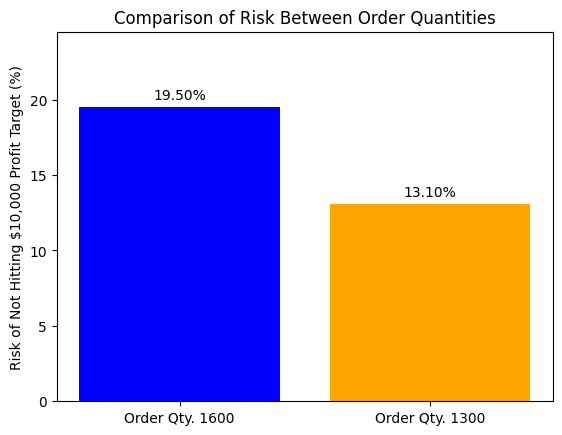

In [26]:
# Calculate the risk percentages
risk_1600_pct = risk_1600  / 10
risk_1300_pct = risk_1300 / 10

# Plot the comparison of risk between the two order quantities with a bar chart
labels = ['Order Qty. 1600', 'Order Qty. 1300']
risks = [risk_1600_pct, risk_1300_pct]
x = np.arange(len(labels))
plt.bar(x, risks, color=['blue', 'orange'])
plt.xticks(x, labels)
plt.ylabel('Risk of Not Hitting $10,000 Profit Target (%)')
plt.title('Comparison of Risk Between Order Quantities')
plt.ylim(0, max(risks) + 5)

# Add value labels on top of the bars
for i in range(len(risks)):
    plt.text(i, risks[i] + 0.5, f'{risks[i]:.2f}%', ha='center')

plt.show()